The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score



import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.sample(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
805,IND,India,THANE PLANT,WRI1019990,22.5,19.0875,73.0258,Oil,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,IND,India,Gondri Solar Power Plant,WRI1026142,5.0,18.3055,76.6551,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,IND,India,Kamuthi Solar Power Plant,WRI1026151,648.0,9.3381,78.3917,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,IND,India,SANGLI KRANTI,WRI1019981,19.7,17.1354,74.4272,Biomass,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,IND,India,Andrha Lake Wind Farm,WRI1026768,113.6,18.8580,73.6396,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,IND,India,JAYPEE REWA CEMENT,WRI1020000,54.5,24.5650,81.1748,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544,IND,India,NORTH CHENNAI,IND0000307,630.0,13.2450,80.3257,Coal,Oil,NaN,...,WRI,NaN,2018.0,3720.0640,3864.4340,4046.394,3365.7460,3824.13900,Central Electricity Authority,NaN
246,IND,India,Godawari,WRI1020242,50.0,27.6003,72.2241,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577,IND,India,PARBATI-III,IND0000326,520.0,31.7398,77.2576,Hydro,NaN,NaN,...,WRI,NaN,2018.0,4.7561,657.4761,639.785,679.0676,706.97735,Central Electricity Authority,NaN
468,IND,India,MARATHA CEMENT PLANT,WRI1019969,45.0,19.7030,79.2206,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape


(908, 25)

In [6]:
df.isnull().sum()


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [8]:
df.isnull().sum()


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

we are going to remove some columns those having maximum no of null values and also some unwamted columns because if we fill those values prediction will not be correct

In [9]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2','gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)


In [10]:
df.isnull().sum()


country                    0
country_long               0
name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2013      524
generation_gwh_2014      507
generation_gwh_2015      483
generation_gwh_2016      471
generation_gwh_2017      465
dtype: int64

In [11]:
df.describe()


,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [12]:
# checking for unique values
df['year_of_capacity_data'].nunique()


1

In [13]:
# removing 'year_of_capacity_data' column
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [14]:
# removing 'name ' column
df.drop(['name','url'],axis=1,inplace=True)

In [15]:
#checking for unique values
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [16]:
# filling geolocation_source with mode because category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [17]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

In [18]:
df.isnull().sum()


country                0
country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

succesfully removed the null values 

In [19]:
df['source'].nunique()


191

In [20]:
df['geolocation_source'].nunique()


3

In [21]:
df['country'].nunique()


1

dropping columns'country' and 'country_long' because having one country name only,it will not help for any prediction

In [22]:
df.drop(['country','country_long'],axis=1,inplace=True)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    object 
 6   geolocation_source   908 non-null    object 
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

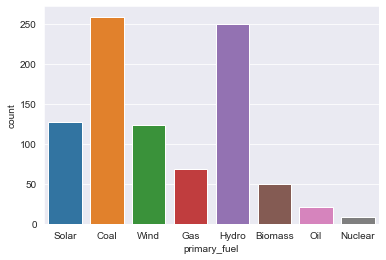

In [24]:
#count plot
sns.set_style("darkgrid")
sns.countplot(x="primary_fuel", data=df)

# EDA

In [25]:
df.head()


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,60.000000,60.000000,60.000,60.000000,60.000000
1,98.0,24.7663,74.6090,Coal,60.0,Ultratech Cement ltd,WRI,60.000000,60.000000,60.000,60.000000,60.000000
2,39.2,21.9038,69.3732,Wind,60.0,CDM,WRI,60.000000,60.000000,60.000,60.000000,60.000000
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


<AxesSubplot:>

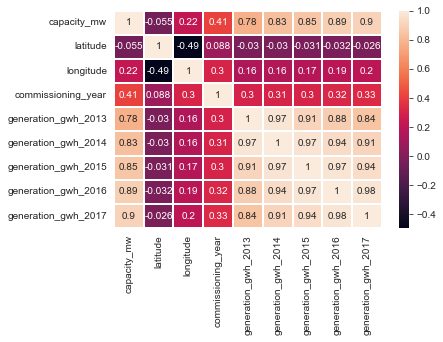

In [26]:
dfcorr=df.corr()
sns.heatmap(dfcorr,annot=True, linewidth=2)


Here we can notice generation_gwh_2013,__2014,__2015,__2016 ,__2017 are positively correlated to capacity_mw and latitude is negative correlated

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2013'>

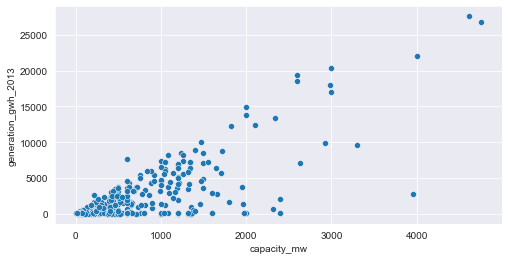

In [27]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)

we can notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2013

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

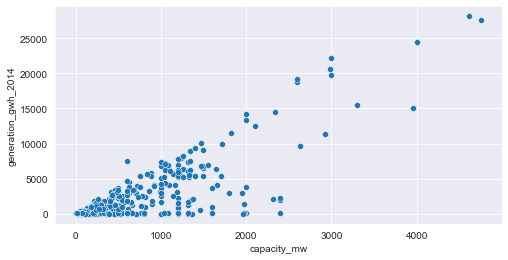

In [28]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)


In 2014 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2014

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

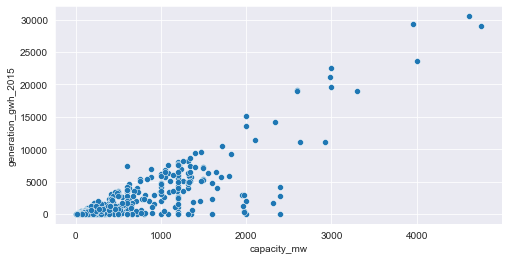

In [29]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

In 2015 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2015

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

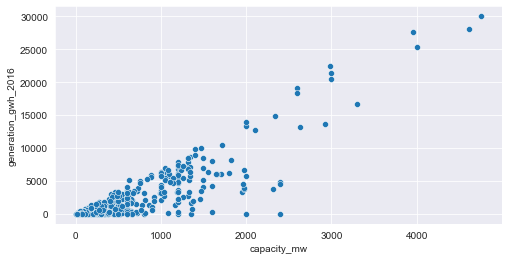

In [30]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

In 2016 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2016

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

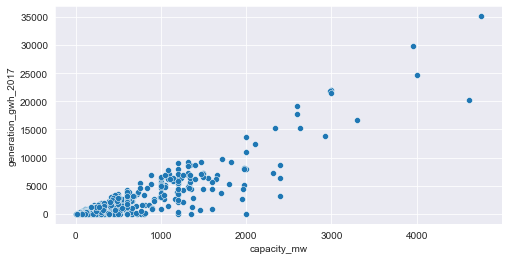

In [31]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

In 2017 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2017

<AxesSubplot:xlabel='capacity_mw', ylabel='latitude'>

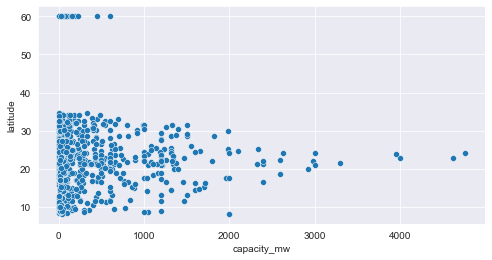

In [32]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2013'>

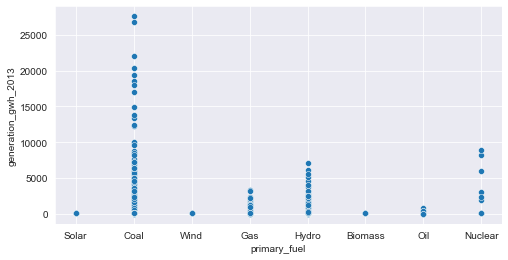

In [33]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)

we can here the coal is most used fuel in 2013 and Nuclear,Gas and hydro on average use and Solar,Wind Bomass and oil was very less used

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

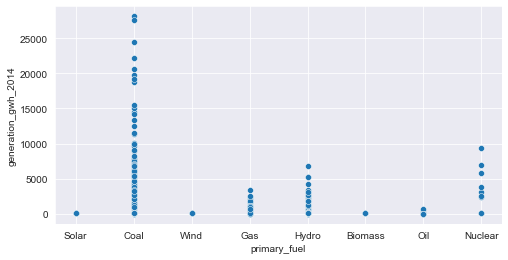

In [34]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

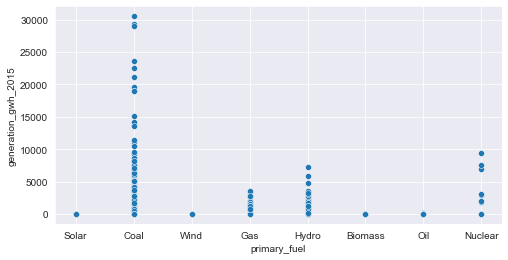

In [35]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

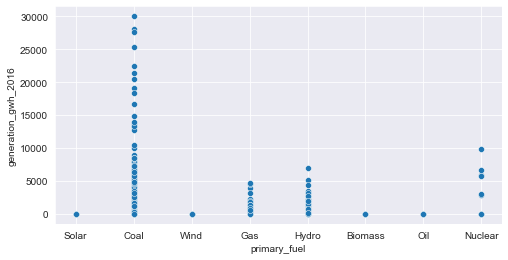

In [36]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

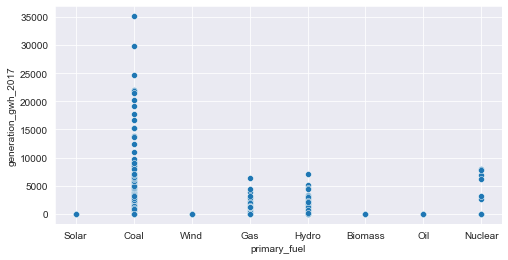

In [37]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

Coal is the mostly used fuel in the entire series of years. whereas oil is used very less.


<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

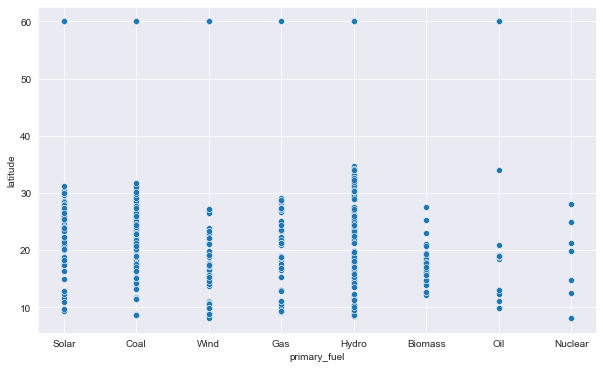

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

# Using LabelEncoder for convering categorical to numerical


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    object 
 6   geolocation_source   908 non-null    object 
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [40]:
df['primary_fuel'].unique()


array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [41]:
df['geolocation_source'].unique()


array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [42]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [43]:
df['geolocation_source'].unique()


array([1, 2, 0])

In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    int32  
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    int32  
 6   geolocation_source   908 non-null    int32  
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 74.6 KB


# Removing outliers using zscore


In [45]:
z=np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 210,
       210, 210, 210, 210, 210, 309, 309, 309, 309, 309, 309, 364, 365,
       365, 365, 365, 365, 365, 376, 483, 494, 494, 494, 494, 494, 494,
       495, 495, 495, 495, 495, 495, 533, 533, 624, 649, 649, 649, 649,
       649, 649, 658, 658, 658, 658, 658, 658, 696, 696, 696, 696, 696,
       722, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727, 727, 727,
       727, 727, 727, 787, 787, 787, 787, 787, 787, 789, 809, 809, 809,
       809, 809, 809, 881, 881, 881, 881, 881, 881], dtype=int64), array([2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 5, 5, 0, 1, 2, 3, 4, 5, 5, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4,
       5, 0, 1, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 5,
       0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype=int64))


In [47]:
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [48]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (908, 12)
Shape of the dataframe after removing outliers:  (885, 12)
Percentage of data loss post outlier removal:  2.5330396475770924


In [49]:
df.shape


(885, 12)

succesfully removed outliers

# Skewness Handling


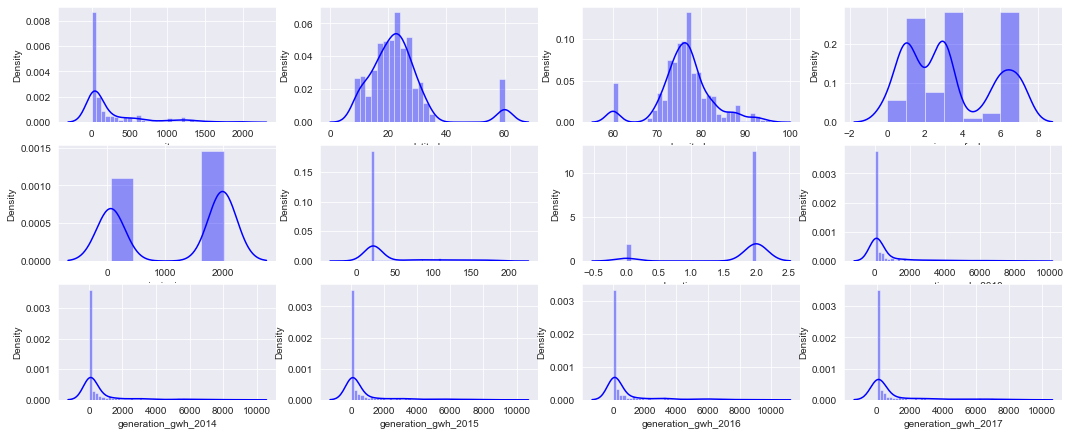

In [51]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [52]:
df.skew()


capacity_mw            2.052718
latitude               1.965094
longitude             -0.179399
primary_fuel           0.430662
commissioning_year    -0.285274
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013    2.994575
generation_gwh_2014    2.867788
generation_gwh_2015    2.684811
generation_gwh_2016    2.630710
generation_gwh_2017    2.540274
dtype: float64

lets treat the skewness more then (-/+0.5)

In [54]:
df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
df.skew()

capacity_mw           -0.024446
latitude               1.965094
longitude             -0.179399
primary_fuel           0.430662
commissioning_year    -0.285274
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013   -0.333653
generation_gwh_2014   -0.275178
generation_gwh_2015   -0.258690
generation_gwh_2016   -0.248297
generation_gwh_2017   -0.229956
dtype: float64

In [55]:
pd.DataFrame(df).isnull().sum()


capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

# Regression model

Dividing data into X and Y

In [56]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']# target variable

In [57]:
x.shape


(885, 11)

In [58]:
y.shape


(885,)

 scaling X values

In [59]:
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [60]:
pd.DataFrame(x).describe()


,0,1,2,3,4,5,6,7,8,9,10
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,0.290048,0.464901,0.466182,0.564383,0.233637,0.863277,0.620486,0.595989,0.595707,0.593126,0.590408
std,0.204202,0.173085,0.326078,0.489898,0.237158,0.342100,0.179336,0.193143,0.196778,0.199455,0.206856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.169119,0.388333,0.142857,0.000000,0.115789,1.000000,0.539975,0.511500,0.509888,0.502913,0.496622
50%,0.269591,0.463212,0.428571,0.978039,0.115789,1.000000,0.539975,0.511500,0.509888,0.502913,0.496622
75%,0.359508,0.539802,0.857143,0.991828,0.184211,1.000000,0.739237,0.728194,0.730465,0.727195,0.729361
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# MODEL BUILDING:
Linear Regression

CHECKING THE BEST RANDOM STATE FOR DATA SPLIT

In [61]:
LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.5916398461215672
At random state 0, The test accuracy is: 0.606747274010396


At random state 1, The training accuracy is: 0.5958312648996071
At random state 1, The test accuracy is: 0.5902792360762521


At random state 2, The training accuracy is: 0.6230851577959062
At random state 2, The test accuracy is: 0.4553096801617994


At random state 3, The training accuracy is: 0.5993958141540201
At random state 3, The test accuracy is: 0.5741639348755521


At random state 4, The training accuracy is: 0.5966348615302028
At random state 4, The test accuracy is: 0.5821800072411711


At random state 5, The training accuracy is: 0.6084656246547293
At random state 5, The test accuracy is: 0.5282793364968916


At random state 6, The training accuracy is: 0.6052198009093626
At random state 6, The test accuracy is: 0.5323798617661357


At random state 7, The training accuracy is: 0.6043699401172393
At random state 7, The test accuracy is: 0.541506588679

SPLITTING THE DATA WITH RANDOM STATE =98

In [62]:
#splitting the data into 73% training and 27% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=98)

In [63]:
x_train.shape


(646, 11)

In [64]:
x_test.shape


(239, 11)

In [65]:
y_train.shape


(646,)

In [66]:
y_test.shape


(239,)

In [67]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.5713139766057092


In [68]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 0.36903129488094144
MAE: 0.4839999122303364
r2_score: 0.39570691029867644


# Ridge

In [69]:
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)


0.5712138648690942


In [70]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))


MSE: 0.3683310338741951
MAE: 0.48460046374050403
r2_score: 0.38961555206867804


# SVR

In [71]:
svr=SVR(kernel='linear')#kernel linear
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.5276791570600463


In [72]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.36270277225100434
MAE: 0.4410878635247736
r2_score: 0.5214830255568015


In [73]:
svr_p=SVR(kernel='poly')#kernel poly
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.7815333102479143


In [74]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))


MSE: 0.19668225069693826
MAE: 0.3270048998554594
r2_score: 0.7435816273483156


In [75]:
svr_r=SVR(kernel='rbf')#kernel 'rbf'
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.7825731871707287


In [76]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 0.20203999019026828
MAE: 0.33007466501995475
r2_score: 0.7303406534268757


# RandomForestRegressor

In [77]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)


0.9646642701587224


In [78]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))


MSE: 0.17146478865406917
MAE: 0.2998641921406044
r2_score: 0.7994727187357972


# DecisionTreeRegressor

In [79]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9927559457107207


In [80]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 0.2767702236534215
MAE: 0.369433298494727
r2_score: 0.7243810882229449


# GradientBoostingRegressor

In [81]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.8883093157888198


In [82]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.16527436337523585
MAE: 0.30061074619820843
r2_score: 0.8040840105821658


# cross validation


In [88]:
np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:2f}".format(name,score.mean(),score.std()))

LR    : 0.418087, 0.064830
R    : 0.416718, 0.064420
svr    : 0.464957, 0.079086
svr_p    : 0.253832, 0.056291
svr_r    : 0.234815, 0.066162
RF    : 0.214284, 0.061380
DTR    : 0.311695, 0.092199
GBR    : 0.204845, 0.066740


According to all metrics score selecting the GradientBoostingRegressoras for GridSeachCV



# HYPER PARAMETER TUNING
GridSearchCV

GradientBoostingRegressor

In [89]:
GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

In [90]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)


In [91]:
GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [92]:
GF_grid.best_params_


{'criterion': 'mse', 'n_estimators': 100}

In [93]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))

MSE: 0.17401400493672003
MAE: 0.30330881154100836
r2_score: 0.7965228904362998


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

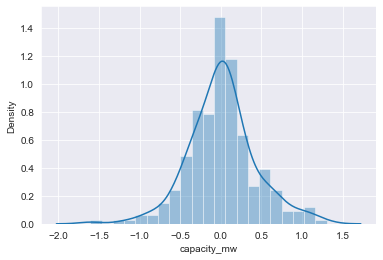

In [94]:
sns.distplot(GF_grid_pred-y_test)


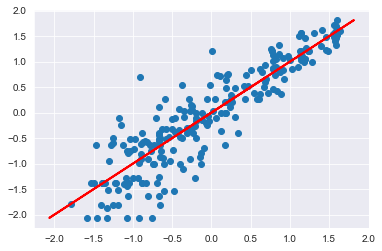

In [95]:
plt.scatter(GF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

Choosing GradientBoostingRegressor as the best model

# Saving the model

In [96]:
import joblib
joblib.dump(GF_grid.best_estimator_,'Global_Power_Plant_Regression.pkl')
   

['Global_Power_Plant_Regression.pkl']

# TAKING 'primary_fuel' AS TARGET , CREATING CLASSIFICATION MODEL
Dividing data into X and Y

In [97]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [98]:
x.shape

(885, 11)

In [99]:
y.shape

(885,)

# Spliting Train and Test data


In [103]:
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=20)

In [104]:
x_train.shape


(708, 11)

In [105]:
x_test.shape

(177, 11)

In [106]:
y_train.shape


(708,)

In [107]:
y_test.shape


(177,)

# MODEL BUILDING

# LogisticRegression


In [108]:
# logreg=LogisticRegression()
# logreg_score=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
# print("cross validation score:",np.mean(logreg_score)
logrg=LogisticRegression()
logrg_score=cross_val_score(logrg,x,y,cv=6,scoring='accuracy')
print("cross validation score:",np.mean(logrg_score))      
      

cross validation score: 0.5322286572286572


In [109]:
logrg.fit(x_train,y_train)
LR_predicted=logrg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logrg.score(x_train,y_train))
print("Test accuracy::",logrg.score(x_test,y_test))

0.519774011299435
[[ 0  2  0  0  0  0 10  1]
 [ 0  5  0 34  0  0  7  0]
 [ 0  1  0 13  0  0  2  2]
 [ 0  1  0 48  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  4  0  0  1  1]
 [ 0  1  0  0  0  0 22  4]
 [ 0  0  0  0  0  0  0 17]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.50      0.11      0.18        46
           2       0.00      0.00      0.00        18
           3       0.48      0.98      0.64        49
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         6
           6       0.52      0.81      0.64        27
           7       0.68      1.00      0.81        17

    accuracy                           0.52       177
   macro avg       0.27      0.36      0.28       177
weighted avg       0.41      0.52      0.40       177

Training accuracy:: 0.53954802259887
Test accuracy:: 0.519774011299435


# DECISION TREE CLASSIFIER


In [110]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))


cross validation score for svm: 0.7864406779661017


In [111]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7457627118644068
[[10  3  0  0  0  0  0  0]
 [ 1 29  6  8  1  1  0  0]
 [ 1  4  6  4  0  3  0  0]
 [ 0  5  0 42  0  2  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  2  1  2  0  1  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 17]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.66      0.63      0.64        46
           2       0.46      0.33      0.39        18
           3       0.75      0.86      0.80        49
           4       0.00      0.00      0.00         1
           5       0.14      0.17      0.15         6
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        17

    accuracy                           0.75       177
   macro avg       0.61      0.59      0.60       177
weighted avg       0.74      0.75      0.74       177

Training accuracy:: 1.0
Test accuracy:: 0.7457627118644068


# KNeighborsClassifier


In [112]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7265536723163841


In [113]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6892655367231638
[[ 7  2  2  0  0  0  2  0]
 [ 2 35  2  5  0  0  2  0]
 [ 2  6  4  4  0  0  0  2]
 [ 0  6  2 41  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  1  4  0  0  0  1]
 [ 4  4  0  0  0  0 18  1]
 [ 0  0  0  0  0  0  0 17]]
              precision    recall  f1-score   support

           0       0.47      0.54      0.50        13
           1       0.66      0.76      0.71        46
           2       0.36      0.22      0.28        18
           3       0.75      0.84      0.79        49
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         6
           6       0.82      0.67      0.73        27
           7       0.81      1.00      0.89        17

    accuracy                           0.69       177
   macro avg       0.48      0.50      0.49       177
weighted avg       0.65      0.69      0.66       177

Training accuracy:: 0.8163841807909604
Test accuracy:: 0.6892655367231638


# RandomForestClassifier

In [114]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))


cross validation score for rfc: 0.8474576271186441


In [115]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.807909604519774
[[10  3  0  0  0  0  0  0]
 [ 2 39  0  4  0  1  0  0]
 [ 1  6  5  4  0  2  0  0]
 [ 0  6  0 43  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  1  2  1  0  2  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 17]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.71      0.85      0.77        46
           2       0.62      0.28      0.38        18
           3       0.83      0.88      0.85        49
           4       0.00      0.00      0.00         1
           5       0.40      0.33      0.36         6
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        17

    accuracy                           0.81       177
   macro avg       0.67      0.64      0.64       177
weighted avg       0.80      0.81      0.79       177

Training accuracy:: 1.0
Test accuracy:: 0.807909604519774


# ENSEMBLE TECHNIQUES

ADA BOOST CLASSIFIER

In [116]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x,y,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.5458503575076609


In [117]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.5254237288135594
[[ 0  0  0 13  0  0  0  0]
 [ 0  0  0 46  0  0  0  0]
 [ 0  0  0 17  0  0  0  1]
 [ 0  0  0 49  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  5  0  0  0  1]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 17]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        46
           2       0.00      0.00      0.00        18
           3       0.37      1.00      0.54        49
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         6
           6       1.00      1.00      1.00        27
           7       0.89      1.00      0.94        17

    accuracy                           0.53       177
   macro avg       0.28      0.38      0.31       177
weighted avg       0.34      0.53      0.39       177

Training accuracy:: 0.5692090395480226
Test accuracy:: 0.5254237288135594


# BAGGING CLASSIFIER


In [118]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x,y,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.8327247191011236


In [119]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.8022598870056498
[[10  3  0  0  0  0  0  0]
 [ 1 38  1  4  0  2  0  0]
 [ 1  6  5  5  0  1  0  0]
 [ 0  5  0 44  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  1  2  2  0  1  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 17]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.72      0.83      0.77        46
           2       0.56      0.28      0.37        18
           3       0.80      0.90      0.85        49
           4       0.00      0.00      0.00         1
           5       0.25      0.17      0.20         6
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        17

    accuracy                           0.80       177
   macro avg       0.64      0.62      0.62       177
weighted avg       0.78      0.80      0.79       177

Training accuracy:: 0.9915254237288136
Test accuracy:: 0.8022598870056498


# Gradient Boosting classifier


In [120]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x,y,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8530643513789581


In [121]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8248587570621468
[[10  3  0  0  0  0  0  0]
 [ 2 37  1  4  1  1  0  0]
 [ 1  5  9  1  0  2  0  0]
 [ 0  4  1 44  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  3  1  0  2  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 17]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.74      0.80      0.77        46
           2       0.64      0.50      0.56        18
           3       0.88      0.90      0.89        49
           4       0.00      0.00      0.00         1
           5       0.40      0.33      0.36         6
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        17

    accuracy                           0.82       177
   macro avg       0.68      0.66      0.67       177
weighted avg       0.82      0.82      0.82       177

Training accuracy:: 1.0
Test accuracy:: 0.8248587570621468


# HYPER PARAMETER TUNING


In [122]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [123]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)


In [124]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.8135593220338984


In [125]:
rfc_grid.best_params_


{'criterion': 'gini',
 'min_samples_split': 3,
 'n_estimators': 200,
 'random_state': 10}

model training with best parameters


In [126]:
best_param={
    'criterion' : ['gini'],
    'n_estimators':[200],
    'min_samples_split':[2],
     'random_state':[10]    }

In [127]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)


In [128]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8022598870056498


# Report of RandomForestClassifier


In [129]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_rfc_pred))


CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.72      0.83      0.77        46
           2       0.57      0.22      0.32        18
           3       0.79      0.90      0.84        49
           4       0.00      0.00      0.00         1
           5       0.50      0.33      0.40         6
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        17

    accuracy                           0.80       177
   macro avg       0.67      0.63      0.64       177
weighted avg       0.78      0.80      0.78       177



<AxesSubplot:>

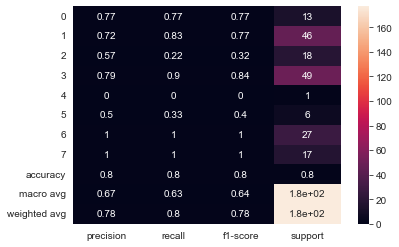

In [130]:
clsf_repo = classification_report(y_test,best_rfc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [133]:
y_prob = best_rfc_grid.fit(x_train,y_train).predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
One-vs-One ROC AUC scores:
0.923515 (macro),
0.943476 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.945420 (macro),
0.958463 (weighted by prevalence)


# Saving Model


In [134]:
import joblib
joblib.dump(best_rfc_grid.best_estimator_,'Global_Power_Plant_Classification.pkl')


['Global_Power_Plant_Classification.pkl']